<a href="https://colab.research.google.com/github/basuh94/ScriptPython/blob/master/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc 
import matplotlib.pyplot as plt 

from sklearn.datasets import make_circles

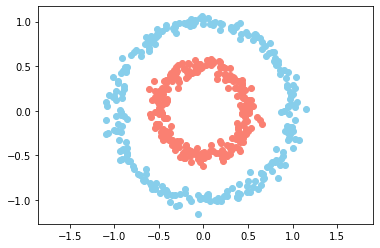

In [90]:
# CREAR EL DATASET
n = 500 #Numero de registros 
p = 2 #Cuantas caracteristicas tenemos de uno de nuestros datos 

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05) 

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0]==0, 0],  X[Y[:, 0]==0, 1], c = "skyblue") #Nos muestra todos los datos de Y == 0 en la matriz de color Azul Cielo
plt.scatter(X[Y[:, 0]==1, 0],  X[Y[:, 0]==1, 1], c = "salmon")
plt.axis("equal") # Nos pinta todos los ejes con la misma proporcion
plt.show();

In [0]:
#CLASE DE LA CAPA DE LA RED 

class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    
    self.act_f = act_f

    self.b = np.random.rand(1, n_neur) * 2 -1
    self.W = np.random.rand(n_conn, n_neur) * 2 -1 

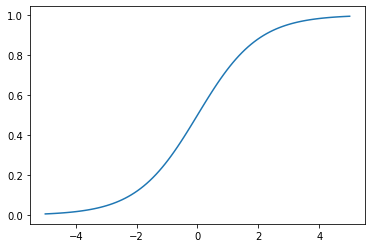

In [88]:
#FUNCIONES DE ACTIVACION
sigm = (lambda x: 1 / (1 + np.e ** (-x)), #Función sigmoide
        lambda x: x* (1-x))               #Deribada de la función sigmoide 

relu = lambda x: np.maximum(0, x) #Todos los valores negativos que sean menor que 0 va a ser 0

_x = np.linspace(-5, 5, 100) # Crear un vector de 100 valores de -5 a 5 
plt.plot(_x, sigm[0](_x)) #Creamos un plot donde en el eje X que pasamos el vector de datos y en el eje Y usamos la función sigm pasandole el valor de X



In [0]:
def create_nn(topology, act_f):
  
  nn = []
  
  for l, layer in enumerate(topology[:-1]):
    
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
  
  return nn


In [114]:
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), #Calculamos el error cuadratico medio (Yp =  Valor que ha predicho nuestra red neuronal,  Yr = El valor real)
           lambda Yp, Yr: (Yp - Yr)) #La deribada de Yp y Yr

def train(neural_net, X , Y, l2_cost, lr=0.5, train=True): #lr es el ratio de aprendizaje 
  
  out = [(None, X)]

  # Foward pass
  for l, layer in enumerate(neural_net):
    
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b #z es la suma ponderada de la primera capa
    a = neural_net[l].act_f[0](z)

    out.append((z, a))
  #print(l2_cost[0](out[-1][1], Y))

  if train:

    #Backward pass
    deltas = []

    for l in  reversed(range(0, len(neural_net))):
      
      z = out[l+1][0]
      a = out[l+1][1]

      #print(a.shape)

      if l == len(neural_net) - 1:
        #Calcular delta ultima capa
        deltas.insert(0,l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        #Calcular delta respecto a capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
      
      _W = neural_net[l].W

      #Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
  
  return out[-1][1]
    


train(neural_net, X, Y, l2_cost, 0.5)
print("")

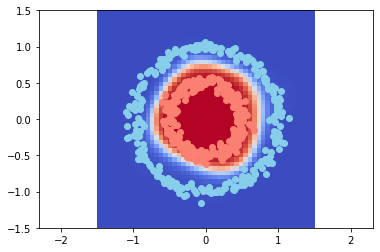

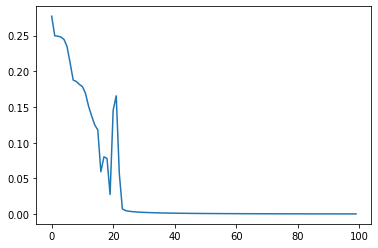

In [117]:
# VISUALIZACIÓN Y TEST

import time 
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
  #Entramos a la red !
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)

  if i % 25 == 0: 
    
    print(pY)

    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]
    
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)